<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-2" data-toc-modified-id="Chapter-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 2</a></span></li></ul></div>

## Chapter 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

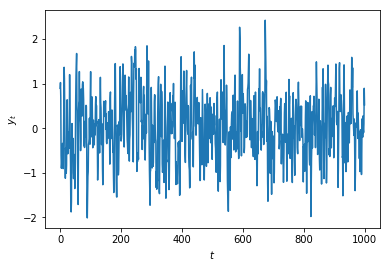

/Users/brianosullivan/miniconda3/envs/churn-analysis/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


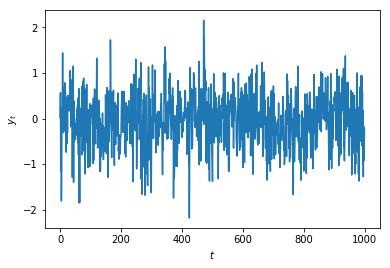

In [38]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARMA
np.random.seed(3)

# Set coefficients
ar_coefs = [1, -0.9, 0.3]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=1000, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

sample = pd.DataFrame({'timeseries_1': y})

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, 0.2, 0.6, -0.1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=1000, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

sample['timeseries_2'] = y

In [39]:
# Instantiate the model
model = ARMA(sample['timeseries_1'], order=(2,0))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:           timeseries_1   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood                -733.435
Method:                       css-mle   S.D. of innovations              0.504
Date:                Thu, 21 Nov 2019   AIC                           1474.870
Time:                        08:25:57   BIC                           1494.501
Sample:                             0   HQIC                          1482.331
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0220      0.038      0.585      0.558      -0.052       0.096
ar.L1.timeseries_1     0.8910      0.030     29.707      0.000       0.832       0.950
ar.L2.timeseries_1  

/Users/brianosullivan/miniconda3/envs/churn-analysis/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/brianosullivan/miniconda3/envs/churn-analysis/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/brianosullivan/miniconda3/envs/churn-analysis/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional inde

In [40]:
# Instantiate the model
model = ARMA(sample['timeseries_2'], order=(0,3))

# Fit the model
results = model.fit()

# Print summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:           timeseries_2   No. Observations:                 1000
Model:                     ARMA(0, 3)   Log Likelihood                -736.052
Method:                       css-mle   S.D. of innovations              0.505
Date:                Thu, 21 Nov 2019   AIC                           1482.103
Time:                        08:25:58   BIC                           1506.642
Sample:                             0   HQIC                          1491.430
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0648      0.025     -2.557      0.011      -0.114      -0.015
ma.L1.timeseries_2     0.1463      0.031      4.663      0.000       0.085       0.208
ma.L2.timeseries_2  

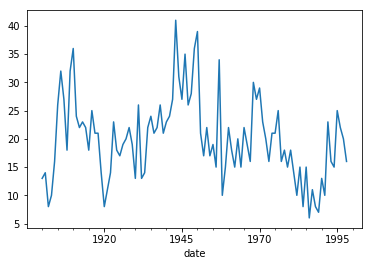

In [42]:
earthquake = pd.read_csv('earthquakes.csv',
                          index_col='date',
                          usecols=['date', 'earthquakes_per_year'],
                          parse_dates=True)
earthquake['earthquakes_per_year'].plot()
plt.show()

In [44]:
# Instantiate the model
model = ARMA(earthquake, order=(3,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                               ARMA Model Results                               
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                       ARMA(3, 1)   Log Likelihood                -315.673
Method:                         css-mle   S.D. of innovations              5.853
Date:                  Thu, 21 Nov 2019   AIC                            643.345
Time:                          08:29:13   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         19.6452      1.929     10.183      0.000      15.864      23.426
ar.L1.earthquakes_per_year     0.5794      0.416      1.393      0.

/Users/brianosullivan/miniconda3/envs/churn-analysis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


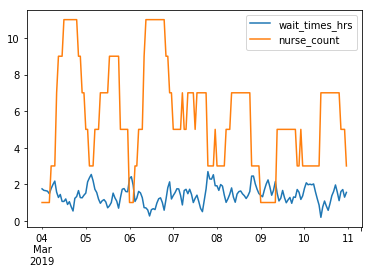

In [47]:
from io import StringIO

hospital_str = ',wait_times_hrs,nurse_count\n2019-03-04 00:00:00,1.7472610495733265,1.0\n2019-03-04 01:00:00,1.66463435594203,1.0\n2019-03-04 02:00:00,1.6470465859073269,1.0\n2019-03-04 03:00:00,1.619511653458451,1.0\n2019-03-04 04:00:00,1.4804148174863567,1.0\n2019-03-04 05:00:00,1.765025187586759,3.0\n2019-03-04 06:00:00,1.9887080373062391,3.0\n2019-03-04 07:00:00,2.1710900839698977,3.0\n2019-03-04 08:00:00,1.566777886852151,7.0\n2019-03-04 09:00:00,1.2767173722039278,9.0\n2019-03-04 10:00:00,1.4403892192757315,9.0\n2019-03-04 11:00:00,1.060018960482198,9.0\n2019-03-04 12:00:00,1.0579986438704996,11.0\n2019-03-04 13:00:00,1.1955198943151941,11.0\n2019-03-04 14:00:00,0.8939939495639757,11.0\n2019-03-04 15:00:00,1.044169082174422,11.0\n2019-03-04 16:00:00,0.7669777285345547,11.0\n2019-03-04 17:00:00,0.5366243344281322,11.0\n2019-03-04 18:00:00,1.230117447008342,11.0\n2019-03-04 19:00:00,1.3263157456049883,11.0\n2019-03-04 20:00:00,1.652855891408773,9.0\n2019-03-04 21:00:00,1.2692238505427826,9.0\n2019-03-04 22:00:00,1.2574209447550466,7.0\n2019-03-04 23:00:00,1.4016265155363,7.0\n2019-03-05 00:00:00,1.5142316930998907,5.0\n2019-03-05 01:00:00,2.127436071330744,5.0\n2019-03-05 02:00:00,2.3503277709635793,3.0\n2019-03-05 03:00:00,2.533426155161851,3.0\n2019-03-05 04:00:00,2.191820310035871,3.0\n2019-03-05 05:00:00,1.7225192193075032,5.0\n2019-03-05 06:00:00,1.5470378931111204,5.0\n2019-03-05 07:00:00,1.1855675540546822,5.0\n2019-03-05 08:00:00,0.9575902778518238,7.0\n2019-03-05 09:00:00,1.0951064332363845,7.0\n2019-03-05 10:00:00,1.1584433575412858,7.0\n2019-03-05 11:00:00,1.0287979334844957,7.0\n2019-03-05 12:00:00,0.7104917570163609,7.0\n2019-03-05 13:00:00,0.8222898301047371,9.0\n2019-03-05 14:00:00,0.9988828125310928,9.0\n2019-03-05 15:00:00,1.513861423260519,9.0\n2019-03-05 16:00:00,1.254190253775842,9.0\n2019-03-05 17:00:00,1.0731913187696265,9.0\n2019-03-05 18:00:00,0.6910471301162238,9.0\n2019-03-05 19:00:00,1.2582172355018,5.0\n2019-03-05 20:00:00,1.7255731463980593,5.0\n2019-03-05 21:00:00,1.7625437537416648,5.0\n2019-03-05 22:00:00,1.5973223657985525,5.0\n2019-03-05 23:00:00,1.5913652287927509,5.0\n2019-03-06 00:00:00,2.3166022164586493,1.0\n2019-03-06 01:00:00,2.412687066947711,1.0\n2019-03-06 02:00:00,1.9471399820779824,1.0\n2019-03-06 03:00:00,1.0567422257965948,3.0\n2019-03-06 04:00:00,1.2445196559342329,3.0\n2019-03-06 05:00:00,1.608200001141234,5.0\n2019-03-06 06:00:00,1.5257591250207263,5.0\n2019-03-06 07:00:00,1.2646835480067904,5.0\n2019-03-06 08:00:00,0.7208923796378272,9.0\n2019-03-06 09:00:00,0.7052512961078607,11.0\n2019-03-06 10:00:00,0.5918230004457548,11.0\n2019-03-06 11:00:00,0.2644199649277832,11.0\n2019-03-06 12:00:00,0.6081206922257332,11.0\n2019-03-06 13:00:00,0.6625754394174586,11.0\n2019-03-06 14:00:00,0.6134591995213549,11.0\n2019-03-06 15:00:00,0.9683986137774954,11.0\n2019-03-06 16:00:00,1.2048304641237841,11.0\n2019-03-06 17:00:00,1.2569263752227116,11.0\n2019-03-06 18:00:00,1.0016798326827605,11.0\n2019-03-06 19:00:00,0.5798220869097264,11.0\n2019-03-06 20:00:00,1.169968922663578,9.0\n2019-03-06 21:00:00,1.8095112330280496,9.0\n2019-03-06 22:00:00,2.129909225387839,7.0\n2019-03-06 23:00:00,1.19330521709445,7.0\n2019-03-07 00:00:00,1.3832059984304546,5.0\n2019-03-07 01:00:00,1.5427597140188019,5.0\n2019-03-07 02:00:00,1.7528574235658785,5.0\n2019-03-07 03:00:00,1.7427915387216144,5.0\n2019-03-07 04:00:00,1.3933848582270851,5.0\n2019-03-07 05:00:00,0.867394968896316,7.0\n2019-03-07 06:00:00,1.6572868211254357,5.0\n2019-03-07 07:00:00,1.7223371513813026,5.0\n2019-03-07 08:00:00,1.481997713229153,7.0\n2019-03-07 09:00:00,1.72539318159873,7.0\n2019-03-07 10:00:00,1.4481565444299938,7.0\n2019-03-07 11:00:00,0.9976675427976184,7.0\n2019-03-07 12:00:00,1.2307692292664587,5.0\n2019-03-07 13:00:00,1.4019696054769444,7.0\n2019-03-07 14:00:00,1.0511848641825188,7.0\n2019-03-07 15:00:00,0.6748908446329396,7.0\n2019-03-07 16:00:00,0.5004422668410021,7.0\n2019-03-07 17:00:00,1.1267812627622569,7.0\n2019-03-07 18:00:00,1.7413096813802666,7.0\n2019-03-07 19:00:00,2.6905571682395664,3.0\n2019-03-07 20:00:00,2.2900918618070447,3.0\n2019-03-07 21:00:00,2.2773158177972985,3.0\n2019-03-07 22:00:00,2.5194189995200107,3.0\n2019-03-07 23:00:00,1.9194190667958009,5.0\n2019-03-08 00:00:00,1.9133672273003484,3.0\n2019-03-08 01:00:00,1.6632992633339831,3.0\n2019-03-08 02:00:00,1.982375542202768,3.0\n2019-03-08 03:00:00,1.896861312886128,3.0\n2019-03-08 04:00:00,1.4025965672883165,3.0\n2019-03-08 05:00:00,1.008395787686021,5.0\n2019-03-08 06:00:00,1.2053824016505863,5.0\n2019-03-08 07:00:00,1.4552105016606032,5.0\n2019-03-08 08:00:00,1.7980654467101371,7.0\n2019-03-08 09:00:00,1.2958262208014408,7.0\n2019-03-08 10:00:00,1.0152775807291303,7.0\n2019-03-08 11:00:00,1.4626638163855141,7.0\n2019-03-08 12:00:00,1.5972527256603517,7.0\n2019-03-08 13:00:00,1.6302964592002949,7.0\n2019-03-08 14:00:00,1.4726650601416242,7.0\n2019-03-08 15:00:00,1.3715478537605224,7.0\n2019-03-08 16:00:00,1.2199023381525436,7.0\n2019-03-08 17:00:00,1.3756811505797448,7.0\n2019-03-08 18:00:00,1.6024392135541223,7.0\n2019-03-08 19:00:00,2.443666001492963,3.0\n2019-03-08 20:00:00,2.4481552127489983,3.0\n2019-03-08 21:00:00,2.0207195275174223,3.0\n2019-03-08 22:00:00,1.7212681006973871,3.0\n2019-03-08 23:00:00,1.4899873922102873,3.0\n2019-03-09 00:00:00,1.3950932915835537,1.0\n2019-03-09 01:00:00,1.3150799032039386,1.0\n2019-03-09 02:00:00,1.6912969297321734,1.0\n2019-03-09 03:00:00,2.0127009074429587,1.0\n2019-03-09 04:00:00,2.2369118620449604,1.0\n2019-03-09 05:00:00,1.8603979812486924,1.0\n2019-03-09 06:00:00,1.3976060342277072,1.0\n2019-03-09 07:00:00,1.6680984097601967,1.0\n2019-03-09 08:00:00,2.1445910427013226,1.0\n2019-03-09 09:00:00,1.5109476218276543,5.0\n2019-03-09 10:00:00,1.0858184134614206,5.0\n2019-03-09 11:00:00,1.2383008673810671,5.0\n2019-03-09 12:00:00,1.660296168239458,5.0\n2019-03-09 13:00:00,1.276555456903245,5.0\n2019-03-09 14:00:00,0.9874438906535378,5.0\n2019-03-09 15:00:00,1.1478646119134357,5.0\n2019-03-09 16:00:00,1.277081230083097,5.0\n2019-03-09 17:00:00,0.957546297969064,5.0\n2019-03-09 18:00:00,1.3018922491202451,5.0\n2019-03-09 19:00:00,1.28003343540912,5.0\n2019-03-09 20:00:00,1.7118187317301947,3.0\n2019-03-09 21:00:00,1.5610044752145948,3.0\n2019-03-09 22:00:00,1.1695051789768125,5.0\n2019-03-09 23:00:00,1.3637582870464806,3.0\n2019-03-10 00:00:00,1.7786811221490133,3.0\n2019-03-10 01:00:00,2.0789883842682157,3.0\n2019-03-10 02:00:00,1.972132811798179,3.0\n2019-03-10 03:00:00,2.0022671049574363,3.0\n2019-03-10 04:00:00,1.9706234915384973,3.0\n2019-03-10 05:00:00,2.0151404226023857,3.0\n2019-03-10 06:00:00,1.5894353933734853,3.0\n2019-03-10 07:00:00,1.2110379922991672,3.0\n2019-03-10 08:00:00,0.8615199277580669,3.0\n2019-03-10 09:00:00,0.1905571682395664,7.0\n2019-03-10 10:00:00,0.7568464293987587,7.0\n2019-03-10 11:00:00,1.0816318861468954,7.0\n2019-03-10 12:00:00,0.8028307145371512,7.0\n2019-03-10 13:00:00,0.5727794134144623,7.0\n2019-03-10 14:00:00,0.9429501668118844,7.0\n2019-03-10 15:00:00,1.3698687229151616,7.0\n2019-03-10 16:00:00,1.609254246666234,7.0\n2019-03-10 17:00:00,1.960101331031583,7.0\n2019-03-10 18:00:00,1.5635620096798708,7.0\n2019-03-10 19:00:00,1.1015258740391958,7.0\n2019-03-10 20:00:00,1.6006065824590272,5.0\n2019-03-10 21:00:00,1.7091391001800873,5.0\n2019-03-10 22:00:00,1.293119759798161,5.0\n2019-03-10 23:00:00,1.5525219092549103,3.0\n'
hospital = pd.read_csv(StringIO(hospital_str), index_col=0, parse_dates=[0])
hospital.plot()
plt.show()

In [48]:
hospital.corr()

,wait_times_hrs,nurse_count
wait_times_hrs,1.000000,-0.641371
nurse_count,-0.641371,1.000000


In [51]:
# Instantiate the model
model = ARMA(hospital['wait_times_hrs'], order=(2,1), exog=hospital['nurse_count'])

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:         wait_times_hrs   No. Observations:                  168
Model:                     ARMA(2, 1)   Log Likelihood                 -11.834
Method:                       css-mle   S.D. of innovations              0.259
Date:                Thu, 21 Nov 2019   AIC                             35.668
Time:                        10:31:08   BIC                             54.411
Sample:                    03-04-2019   HQIC                            43.275
                         - 03-10-2019                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.1000      0.086     24.293      0.000       1.931       2.269
nurse_count             -0.1171      0.013     -9.054      0.000      -0.142      -0.092
ar.L1.wait_t

/Users/brianosullivan/miniconda3/envs/churn-analysis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


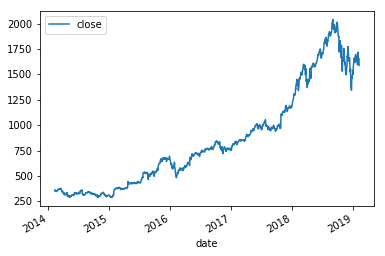

In [144]:
from urllib.request import urlretrieve

file = 'amazon_close.csv'
url = 'https://assets.datacamp.com/production/repositories/4567/datasets/4543d63de229cec637e58f90973b64417e5dc24c/'

urlretrieve(url+file, file)
amazon = pd.read_csv(file, index_col='date', parse_dates=True).sort_index()

amazon.plot()
plt.show()

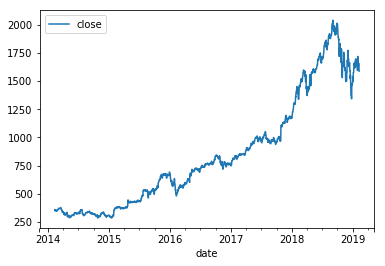

In [145]:
amazon_model = amazon.resample('D').max().fillna(method='ffill')
amazon_model.plot()

In [146]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Instantiate the model
model = SARIMAX(amazon_model['2018':'2019'],
                order=(3,1,3),
                seasonal_order=(1,0,1,7))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                                 Statespace Model Results                                
Dep. Variable:                             close   No. Observations:                  404
Model:             SARIMAX(3, 1, 3)x(1, 0, 1, 7)   Log Likelihood               -1948.106
Date:                           Thu, 21 Nov 2019   AIC                           3914.212
Time:                                   11:32:26   BIC                           3950.202
Sample:                               01-01-2018   HQIC                          3928.460
                                    - 02-08-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1021      0.638      0.160      0.873      -1.149       1.353
ar.L2          0.2145      0.620      0.346

/Users/brianosullivan/miniconda3/envs/churn-analysis/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [147]:
# Generate predictions
one_step_forecast = results.get_prediction(start=-30)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = one_step_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate  predictions
print(mean_forecast)

date
2019-01-10    1658.198178
2019-01-11    1661.104914
2019-01-12    1644.554403
2019-01-13    1642.259383
2019-01-14    1641.125452
2019-01-15    1619.866918
2019-01-16    1671.634292
2019-01-17    1680.194607
2019-01-18    1692.956400
2019-01-19    1697.204520
2019-01-20    1698.982573
2019-01-21    1694.554491
2019-01-22    1698.161104
2019-01-23    1636.531947
2019-01-24    1641.676071
2019-01-25    1650.151492
2019-01-26    1666.939107
2019-01-27    1668.759791
2019-01-28    1674.242420
2019-01-29    1638.368803
2019-01-30    1601.808383
2019-01-31    1663.580952
2019-02-01    1707.092187
2019-02-02    1634.313223
2019-02-03    1634.323987
2019-02-04    1622.945999
2019-02-05    1631.954225
2019-02-06    1655.598063
2019-02-07    1642.876074
2019-02-08    1614.973564
Freq: D, dtype: float64


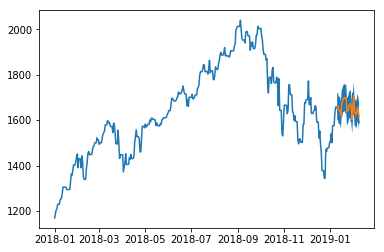

In [148]:
plt.plot(amazon_model['2018':].index,
         amazon_model['2018':])
plt.plot(mean_forecast.index,
         mean_forecast)
plt.fill_between(lower_limits.index,
                 lower_limits,
                 upper_limits)
plt.show()

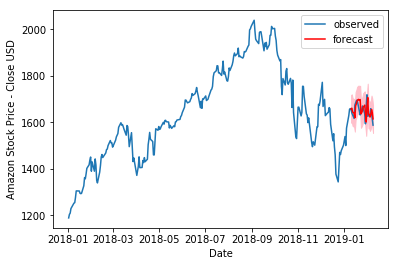

In [149]:
# plot the amazon data
plt.plot(amazon['2018':].index,
         amazon['2018':], label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast,
         color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index,
                 lower_limits, upper_limits,
                 color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

In [152]:
# Generate predictions
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

# Extract prediction mean
mean_forecast = dynamic_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = dynamic_forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

# Print best estimate predictions
print(mean_forecast)

date
2019-01-10    1658.198178
2019-01-11    1662.891165
2019-01-12    1664.823094
2019-01-13    1665.546767
2019-01-14    1667.206975
2019-01-15    1668.291358
2019-01-16    1670.549915
2019-01-17    1671.673826
2019-01-18    1670.978511
2019-01-19    1671.141908
2019-01-20    1671.195553
2019-01-21    1669.996186
2019-01-22    1669.094141
2019-01-23    1667.549792
2019-01-24    1666.856870
2019-01-25    1667.293411
2019-01-26    1667.243176
2019-01-27    1667.225934
2019-01-28    1667.948901
2019-01-29    1668.479606
2019-01-30    1669.399136
2019-01-31    1669.809461
2019-02-01    1669.549648
2019-02-02    1669.579814
2019-02-03    1669.591308
2019-02-04    1669.159190
2019-02-05    1668.842276
2019-02-06    1668.292507
2019-02-07    1668.047360
2019-02-08    1668.202496
Freq: D, dtype: float64


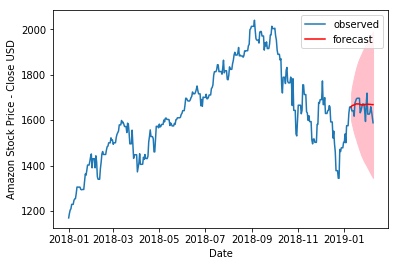

In [155]:
# plot the amazon data
plt.plot(amazon_model['2018':].index, amazon_model['2018':], label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
                 upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Amazon Stock Price - Close USD')
plt.legend()
plt.show()

In [186]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

/Users/brianosullivan/miniconda3/envs/churn-analysis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5531.161
Date:                Thu, 21 Nov 2019   AIC                          11072.322
Time:                        11:52:20   BIC                          11098.008
Sample:                             0   HQIC                         11081.975
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0770      0.004    259.138      0.000       1.069       1.085
ar.L2         -0.9950      0.004   -273.434      0.000      -1.002      -0.988
ma.L1         -1.0915      0.006   -177.322      0.0

In [192]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1, 0]

# Print forecast
print(arma_value_forecast)

1258    1593.664387
1259    1601.970420
1260    1605.498992
1261    1601.035083
1262    1592.716732
1263    1588.199360
1264    1591.610599
1265    1599.779050
1266    1605.182343
1267    1602.874372
dtype: float64


/Users/brianosullivan/miniconda3/envs/churn-analysis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [196]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

/Users/brianosullivan/miniconda3/envs/churn-analysis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1259    1593.650605
1260    1601.937286
1261    1605.459520
1262    1601.007970
1263    1592.708378
1264    1588.198055
1265    1591.598151
1266    1599.748368
1267    1605.144015
1268    1602.846157
dtype: float64


/Users/brianosullivan/miniconda3/envs/churn-analysis/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/brianosullivan/miniconda3/envs/churn-analysis/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
